# Acquire and Prepare - Wrangle

What is it?
- this is the step where we acquire and prepare our data in the data science pipeline
- combining these two steps together are oftening referred to as wrangling

Why do we care?
- this sets us for success in exploration and modeling! 

How is regression wrangle different than classification wrangle?
- NOTHING!


# This Example Pipeline Scenario

Scenario: I'm a university teacher, and I want to know when to worry about a student's progress. I want to be able to work with any students who are at high risk of failing the class, so that I can try to prevent that from happening. I have the grades of the three exams and the final grade from last semester's class. I'm hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

Goal: we are trying to predict a students final grade based on previous exam scores

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Acquire

Goals:
- get data
- cache csv
- understand my data
  - want to know which row represent

In [2]:
# Read csv file into pandas DataFrame.
file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head(3)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [6]:
df.shape

(104, 5)

In [7]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [8]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

Takeaways:
- exam 1 is a float
- exam 2 is an int
- exam 3 is an object
- each row represents a student and their grades.
- my target variable is final grade.


## Prepare

Goals: ?
- correct data types
- nulls
- encode
- split into train, validate, test

### datatypes

In [9]:
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3           object
final_grade      int64
dtype: object

In [10]:
df[df.exam3==' ']

,student_id,exam1,exam2,exam3,final_grade
11,12,57.0,65,,65


In [11]:
df.exam3=df.exam3.replace(' ',np.nan)

In [12]:
df.exam3.dropna()

0      95
1      96
2      87
3      86
4      96
       ..
99     78
100    79
101    70
102    75
103    78
Name: exam3, Length: 103, dtype: object

In [13]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [14]:
df=df.dropna()

Takeaways: ?

In [15]:
df.shape

(102, 5)

In [16]:
df=df.astype(int)

In [17]:
df.dtypes

student_id     int64
exam1          int64
exam2          int64
exam3          int64
final_grade    int64
dtype: object

## Visualization

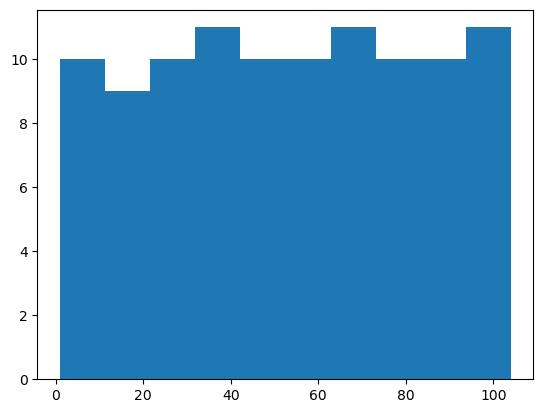

In [23]:
plt.hist(df.student_id)
plt.show()

student_id


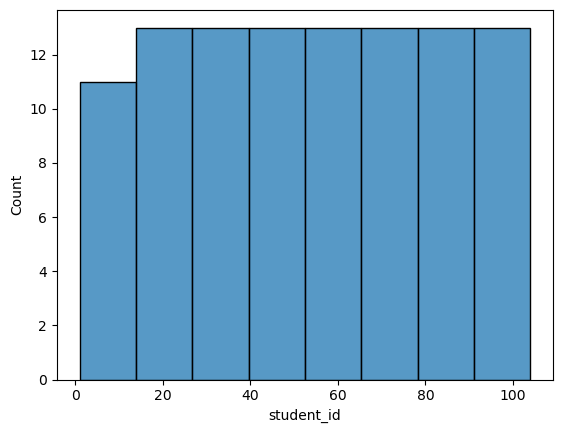

exam1


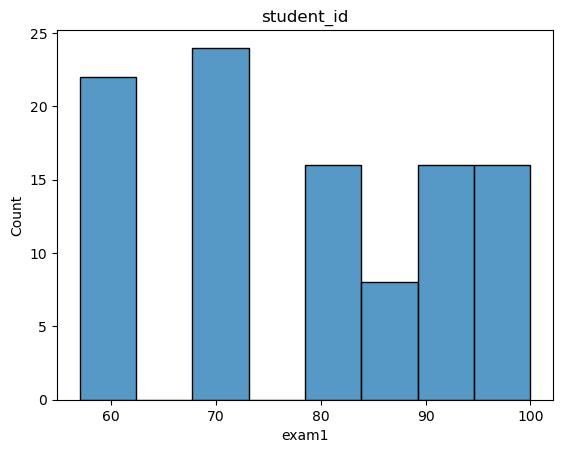

exam2


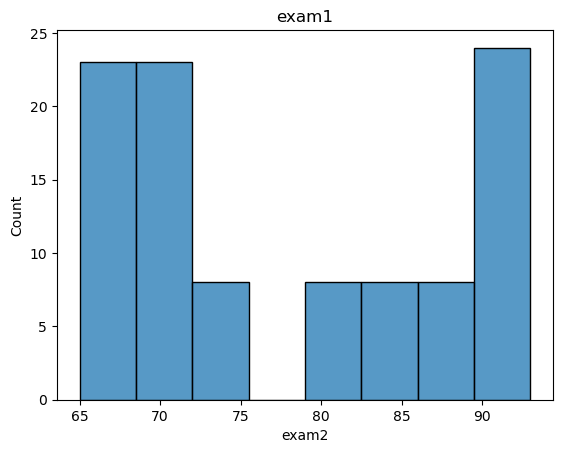

exam3


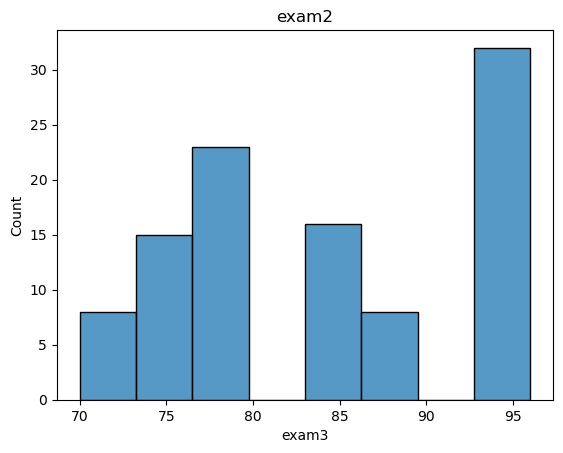

final_grade


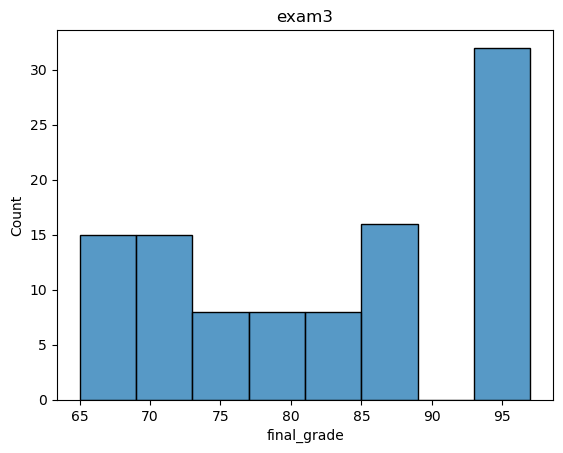

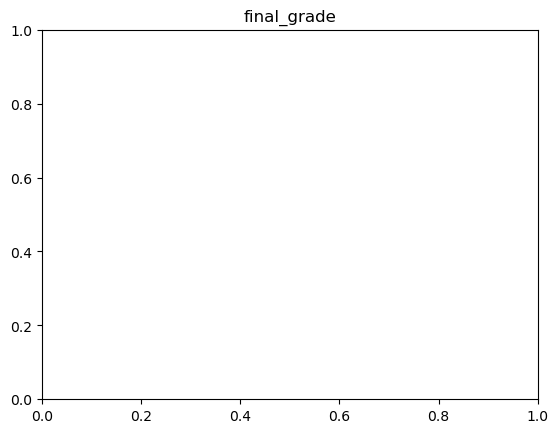

In [26]:
for col in df.columns:
    print (col)
    sns.histplot(df[col])
    plt.show()
    plt.title(col)

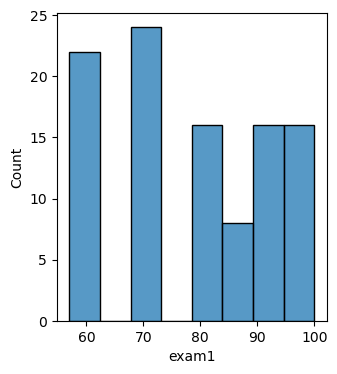

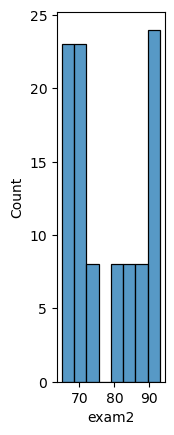

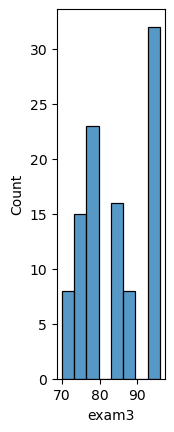

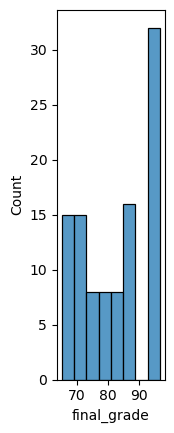

In [34]:
plt.figure(figsize=(16,4))

for i,col in enumerate(df.columns[1:]):

    plt.subplot(1,4,i+1)
    sns.histplot(df[col])
    plt.show()
    

Takeways:
- dropped 2 rows with  nulls
- change data types to int
- none of my columns re normally distributed
- exam 1 is closed to final grade

## Finish wrangle by making a function! 

In [41]:
def wrangle_exams():
    '''
    read csv from url into df, clean df, and return the prepared df
    '''
    # Read csv file into pandas DataFrame.
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    df = pd.read_csv(file)

    #replace blank space with null value
    df.exam3 = df.exam3.replace(' ', np.nan)
    
    #drop all nulls
    df = df.dropna()
    
    #change datatype to exam1 and exam3 to integers
    df.exam1 = df.exam1.astype(int)    
    df.exam3 = df.exam3.astype(int)

    return df

In [42]:
#test it works
df=wrangle_exams()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


#### We train/validate/test before EXPLORE
- however we are gonna talk about scaling on Monday, will do before data split